In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sb

In [22]:
x=np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
print(x)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [23]:
x=np.transpose(x)
print(x)

[[ 1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
   1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
   1920.]
 [30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
  27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
  24700.]
 [ 4000.  6100.  9800. 35200. 59400. 41700. 19000. 13000.  8300.  9100.
   7400.  8000. 12300. 19500. 45700. 51100. 29700. 15800.  9700. 10100.
   8600.]
 [48300. 48200. 41500. 38200. 40600. 39800. 38600. 42300. 44500. 42100.
  46000. 46800. 43800. 40900. 39400. 39000. 36700. 41800. 43300. 41300.
  47300.]]


Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot. Find which year each species had the largest population. Mark these years in the plot of populations.

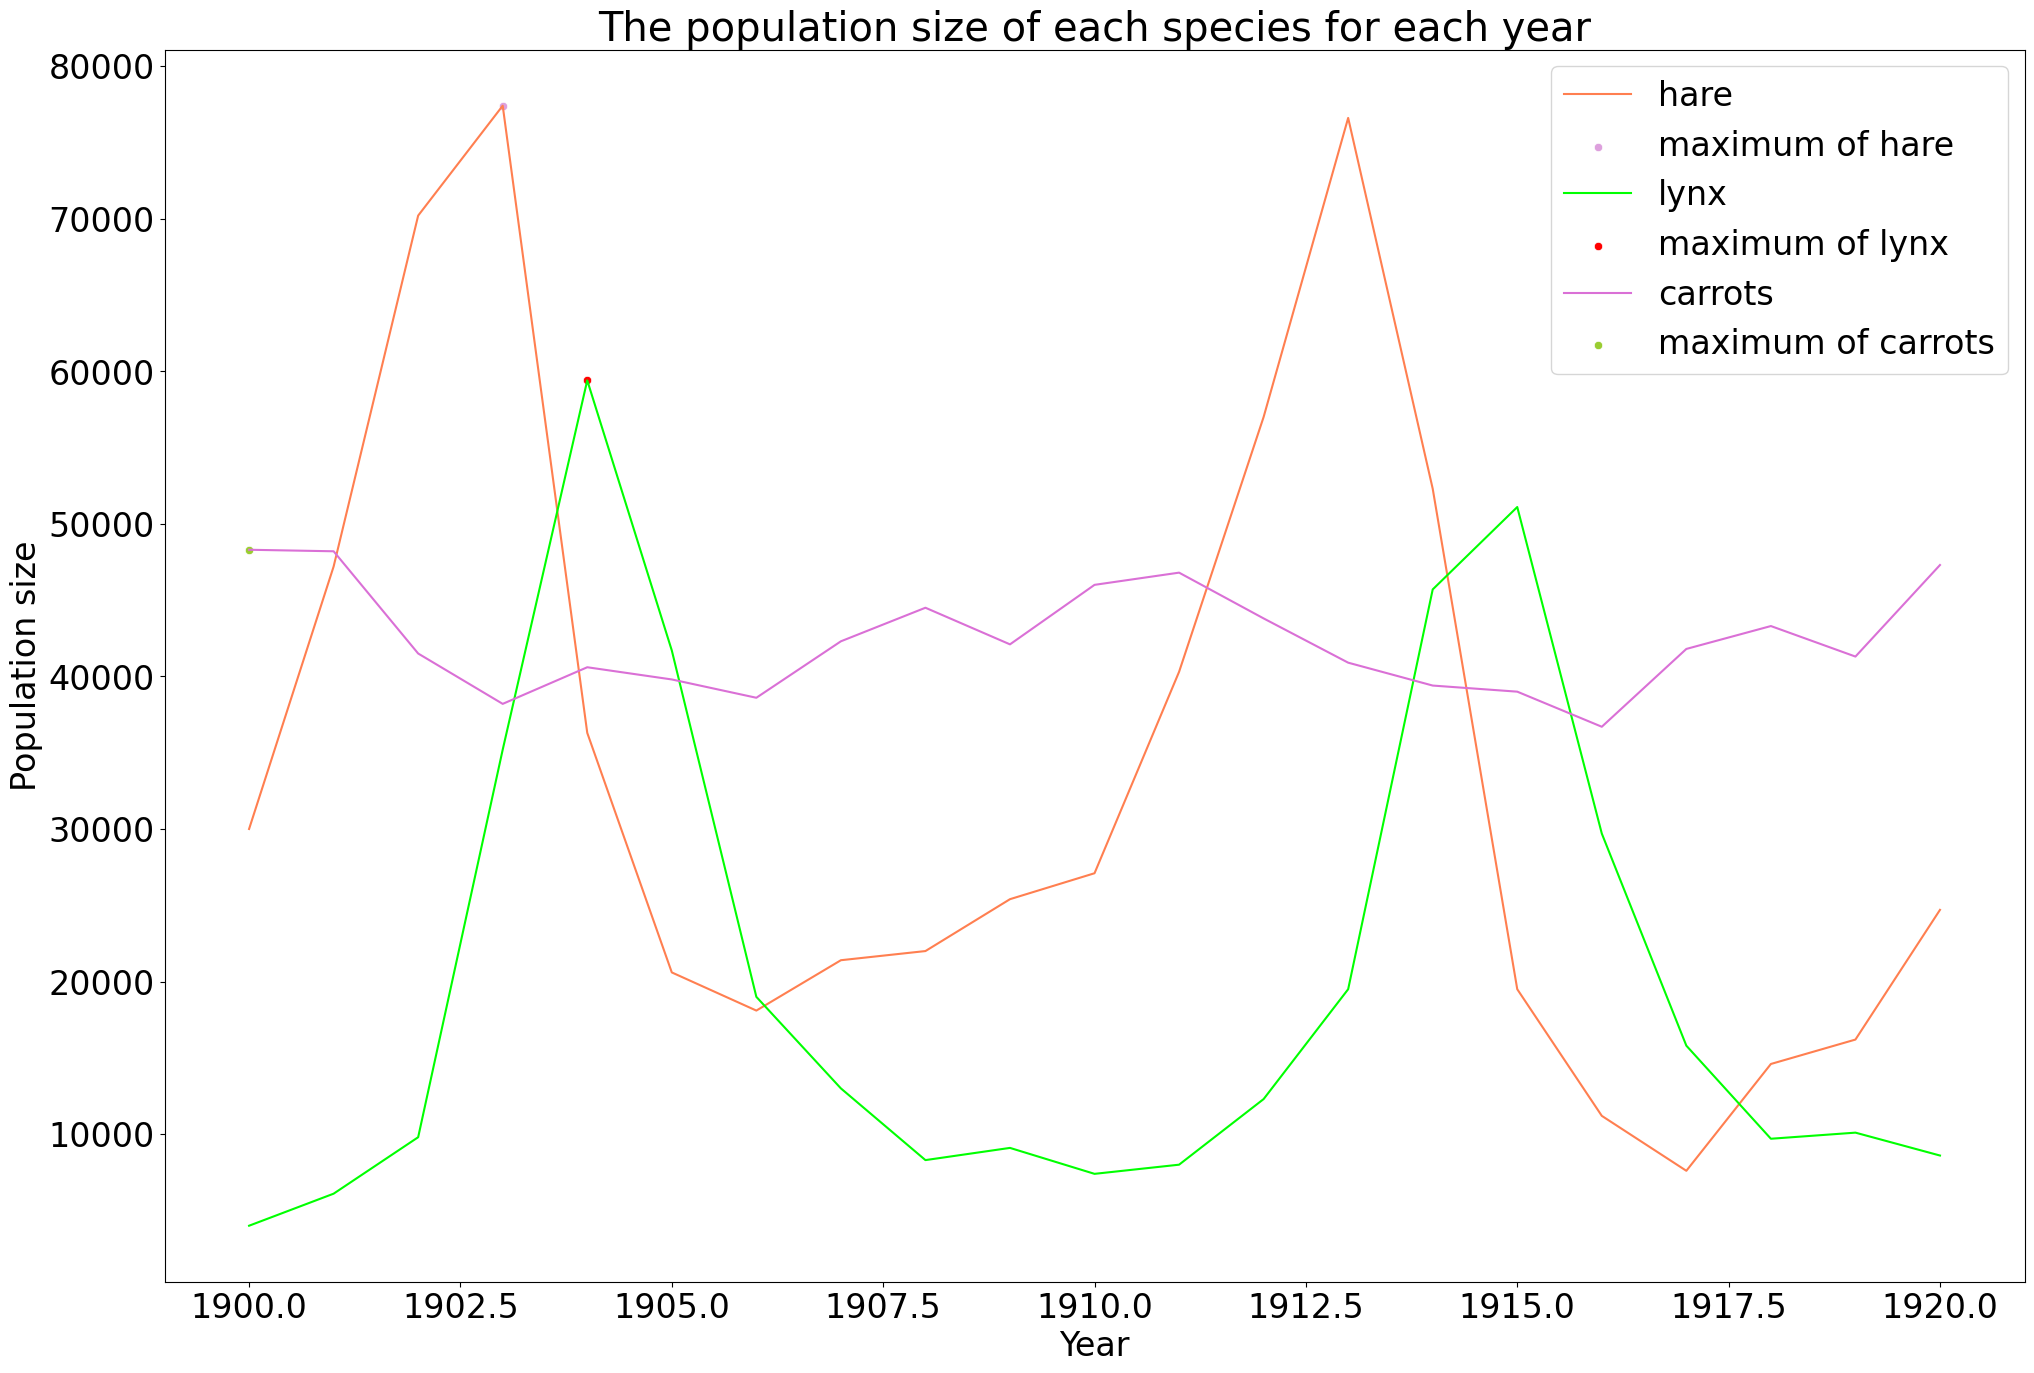

In [44]:
plt.figure(figsize=(24, 16))
plt.rcParams['font.size'] = '24'
plt.xlabel('Year', fontsize=24)
plt.ylabel('Population size', fontsize=24, rotation = 90)

hlc = {1: 'hare', 2: 'lynx', 3 : 'carrots'}

col = dict(zip([i for i in range(1, 4)], ['coral', 'lime', 'orchid']))
col_max = dict(zip([i for i in range(1, 4)], ['plum', 'red', 'yellowgreen']))

for i in range(1, 4):
    plt.xticks = x[0]
    max_x = {x[0][list(x[i]).index(max(x[i]))]:max(x[i])}
    data_ = dict(zip(x[0],x[i]))
    
    line = sb.lineplot(data =data_, label = hlc[i], color=col[i])
    line.set(title='The population size of each species for each year')
    line.xticks = x[0]
    
    graph = sb.scatterplot(data = max_x, label = f'maximum of {hlc[i]}', color = col_max[i])
    
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

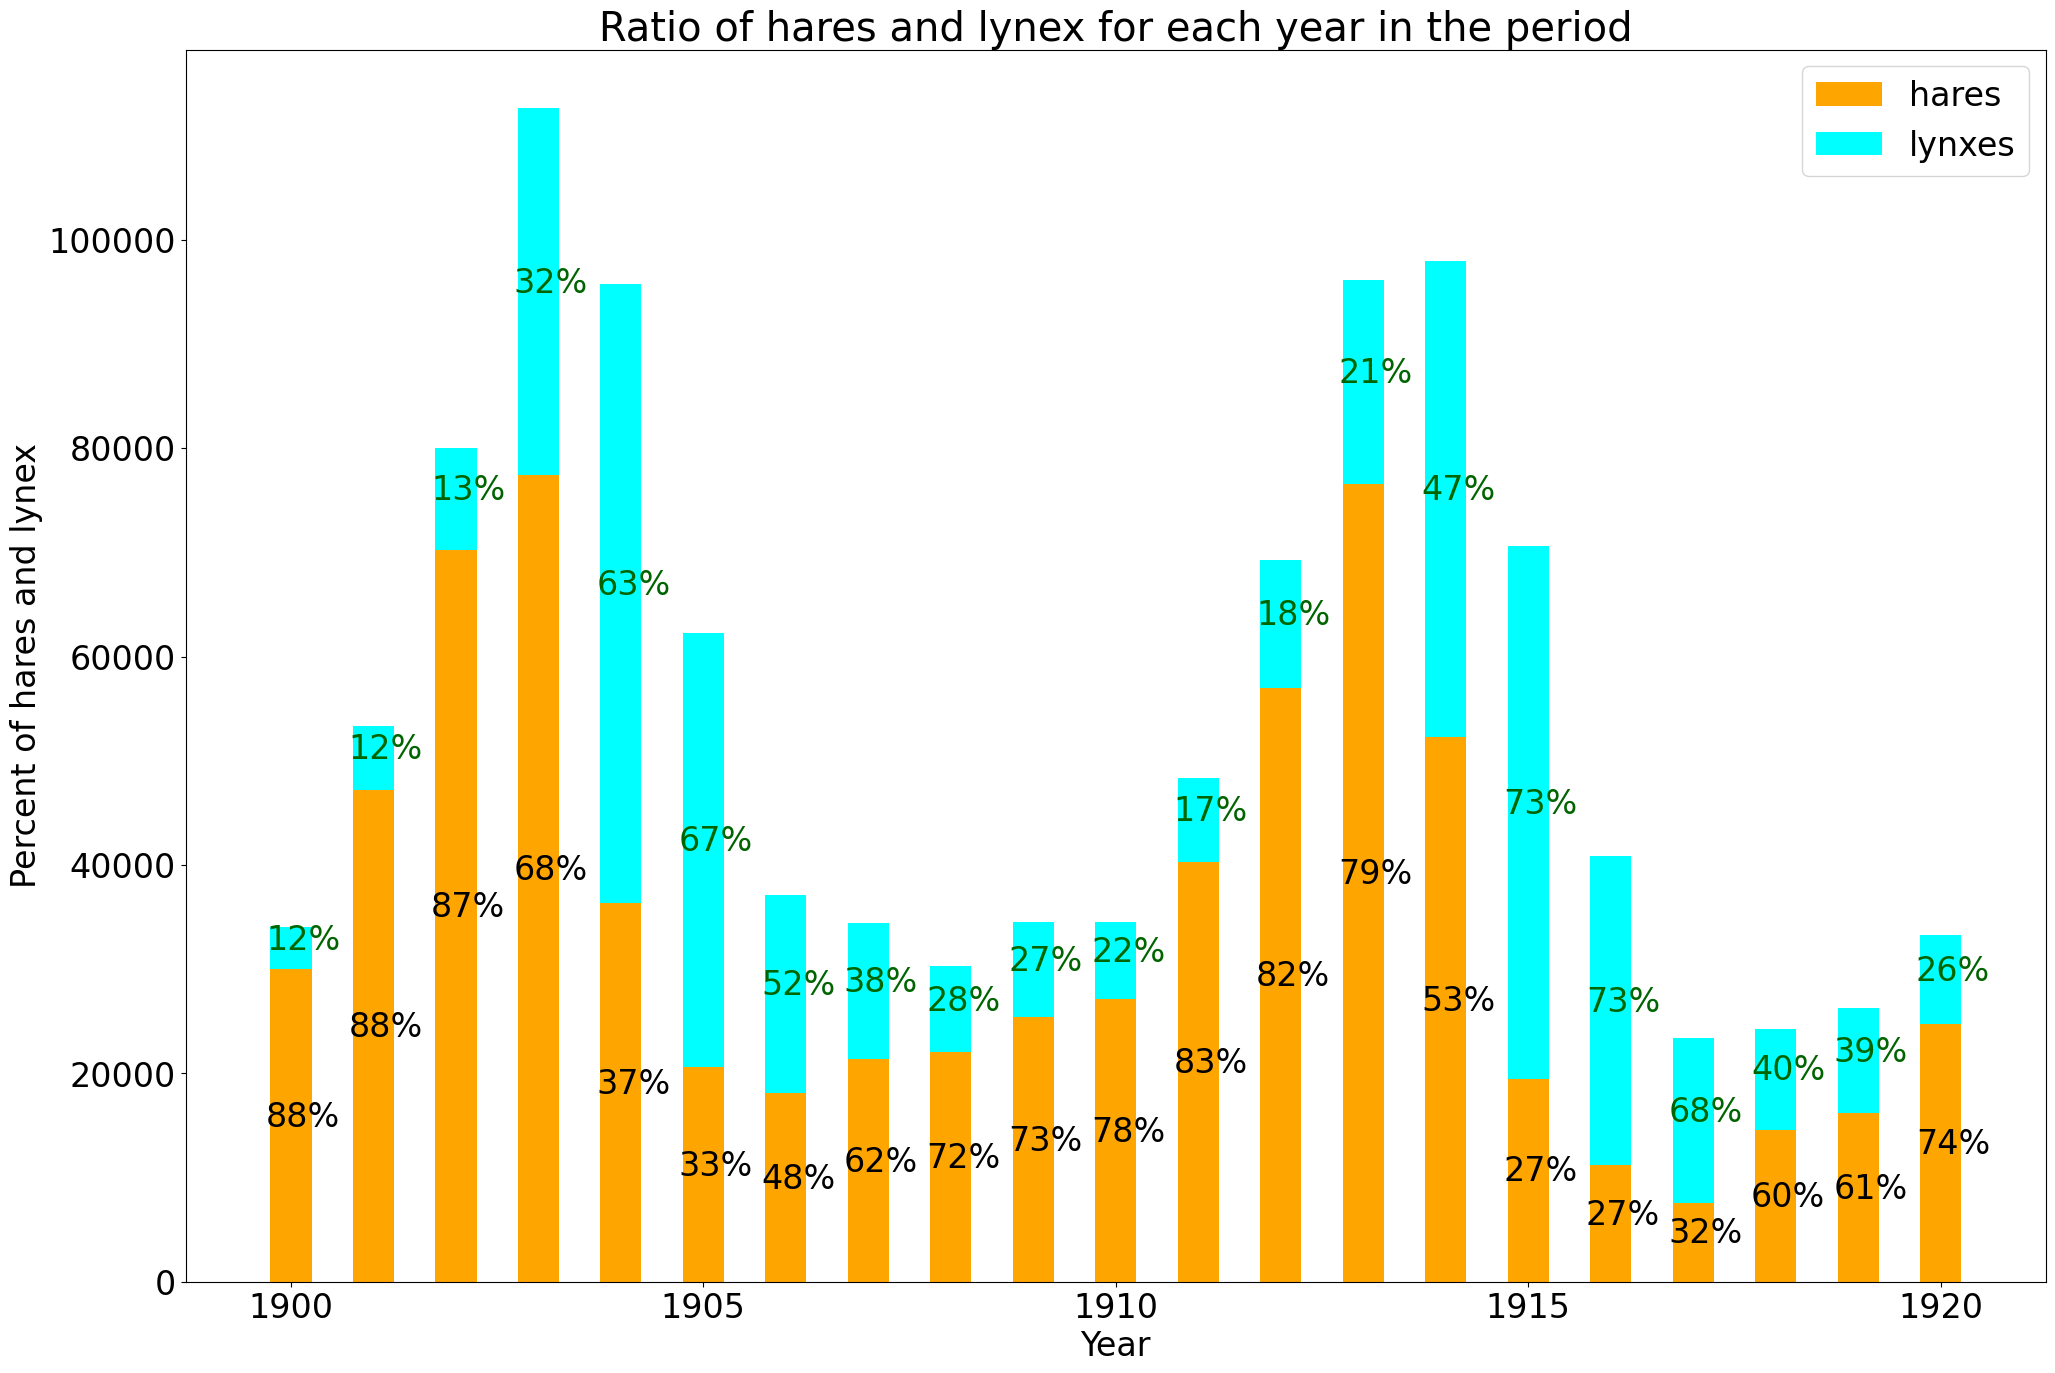

In [70]:
import math as math
plt.figure(figsize = (24, 16))
plt.rcParams['font.size'] = '24'
plt.xlabel('Year', fontsize = 24)
plt.ylabel('Percent of hares and lynex', rotation = 90, fontsize = 24)
l=len(x[0])

stack_dict = {x[0][i] : [math.floor((x[1][i]/(x[1][i] + x[2][i])) * 100)/100, (math.ceil(x[2][i]/(x[1][i] + x[2][i])*100))/100] for i in range(l)}

for i in range(l):
    plt.title('Ratio of hares and lynex for each year in the period')
    plt.bar(x[0], x[1], color = 'orange', width = 0.5)
    plt.text(x[0][i]-0.3, x[1][i]/2 - 100, f'{int(stack_dict[x[0][i]][0]*100)}%',color = 'black')
    plt.bar(x[0], x[2], bottom = x[1], color = 'aqua', width = 0.5)
    plt.text(x[0][i]-0.3, x[1][i] + x[2][i]/2 - 100, f'{int(stack_dict[x[0][i]][1]*100)}%', color = 'darkgreen')
plt.legend(['hares', 'lynxes'])
plt.show()


Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

[]

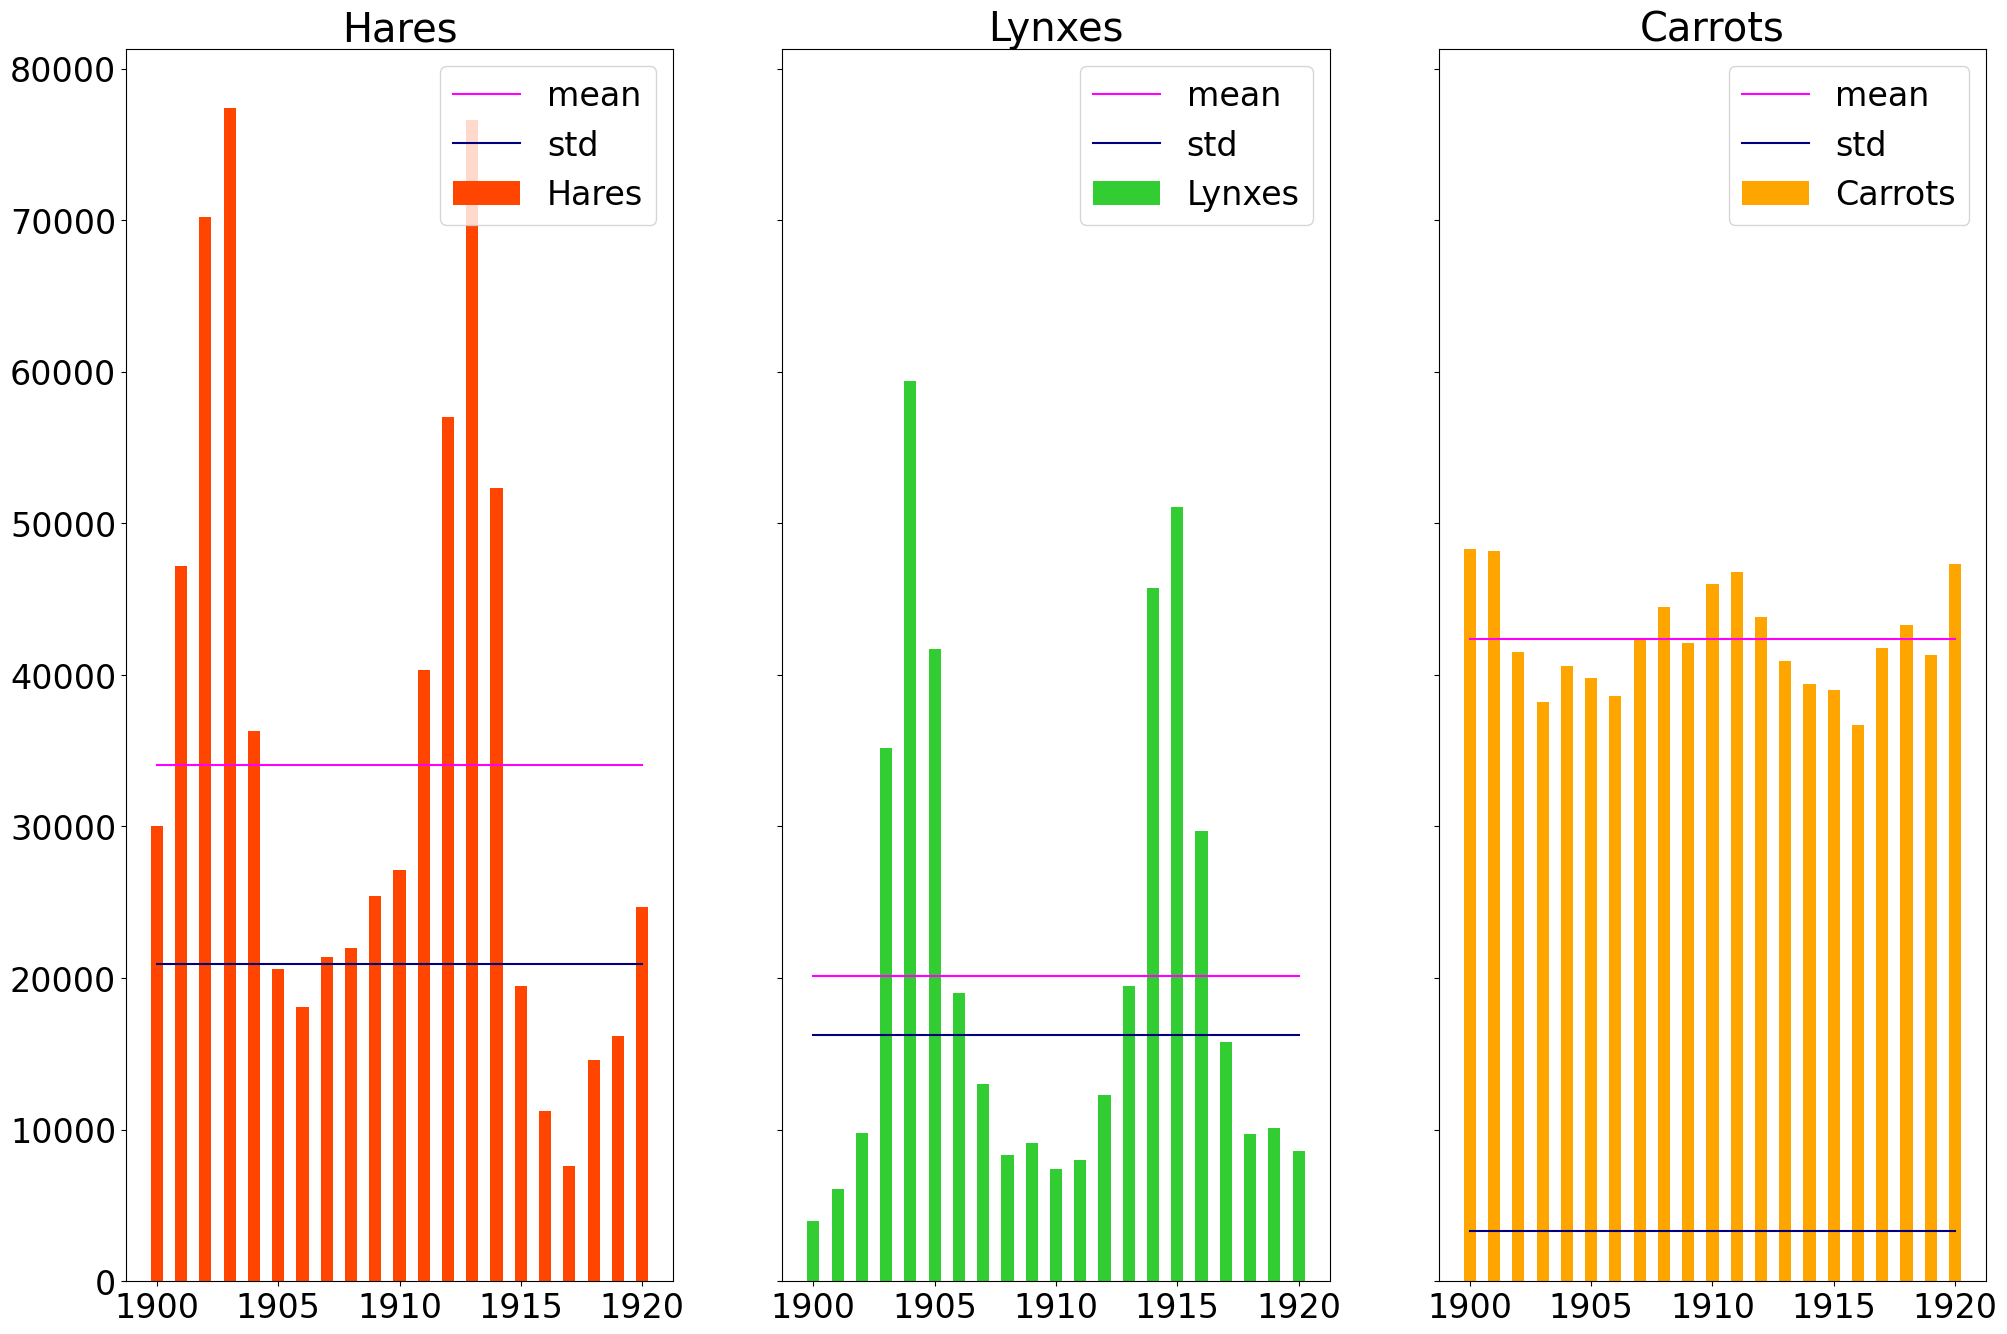

In [76]:
mean_h = np.mean(x[1])
mean_l = np.mean(x[2])
mean_c = np.mean(x[3])

std_h = np.std(x[1])
std_l = np.std(x[2])
std_c = np.std(x[3])

fig, (fig1, fig2, fig3)= plt.subplots(1, 3, figsize = (24, 16), sharey='row')

fig1.bar(x[0], x[1], label = 'Hares', width = 0.5, color = 'orangered')
fig1.plot(x[0], [mean_h for i in range(l)], label = 'mean', color = 'magenta')
fig1.plot(x[0], [std_h for i in range(l)], label = 'std', color = 'navy')

fig2.bar(x[0], x[2], label = 'Lynxes', width = 0.5, color = 'limegreen')
fig2.plot(x[0], [mean_l for i in range(l)], label = 'mean', color = 'magenta')
fig2.plot(x[0], [std_l for i in range(l)], label = 'std', color = 'navy')

fig3.bar(x[0], x[3], label = 'Carrots', width = 0.5, color = 'orange')
fig3.plot(x[0], [mean_c for i in range(l)], label = 'mean', color = 'magenta')
fig3.plot(x[0], [std_c for i in range(l)], label = 'std', color = 'navy')

fig1.set_title('Hares')
fig2.set_title('Lynxes')
fig3.set_title('Carrots')

fig1.legend()
fig2.legend()
fig3.legend()
fig1.plot()
fig2.plot()
fig3.plot()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


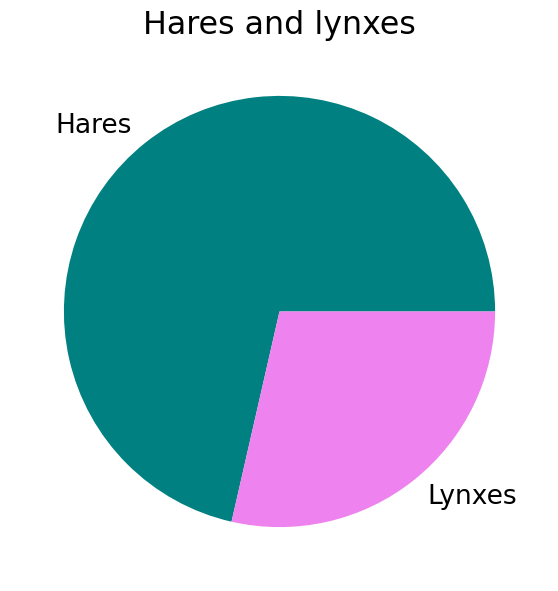

In [104]:
arr = ['H' if x[1][i] > x[2][i] else 'L' for i in range(l)]
print(arr)
arr_ = {'Hares' : arr.count('H'), 'Lynxes' : arr.count('L')}

plt.figure(figsize=(7, 7))
plt.rcParams['font.size'] = '19'

fig = plt.pie(x = arr_.values(), labels = arr_, colors = ['teal', 'violet'])

plt.title('Hares and lynxes')
plt.show()

Plot the change in the hare population and in the hare population for each year. Find the correlation coefficient between the both time series.

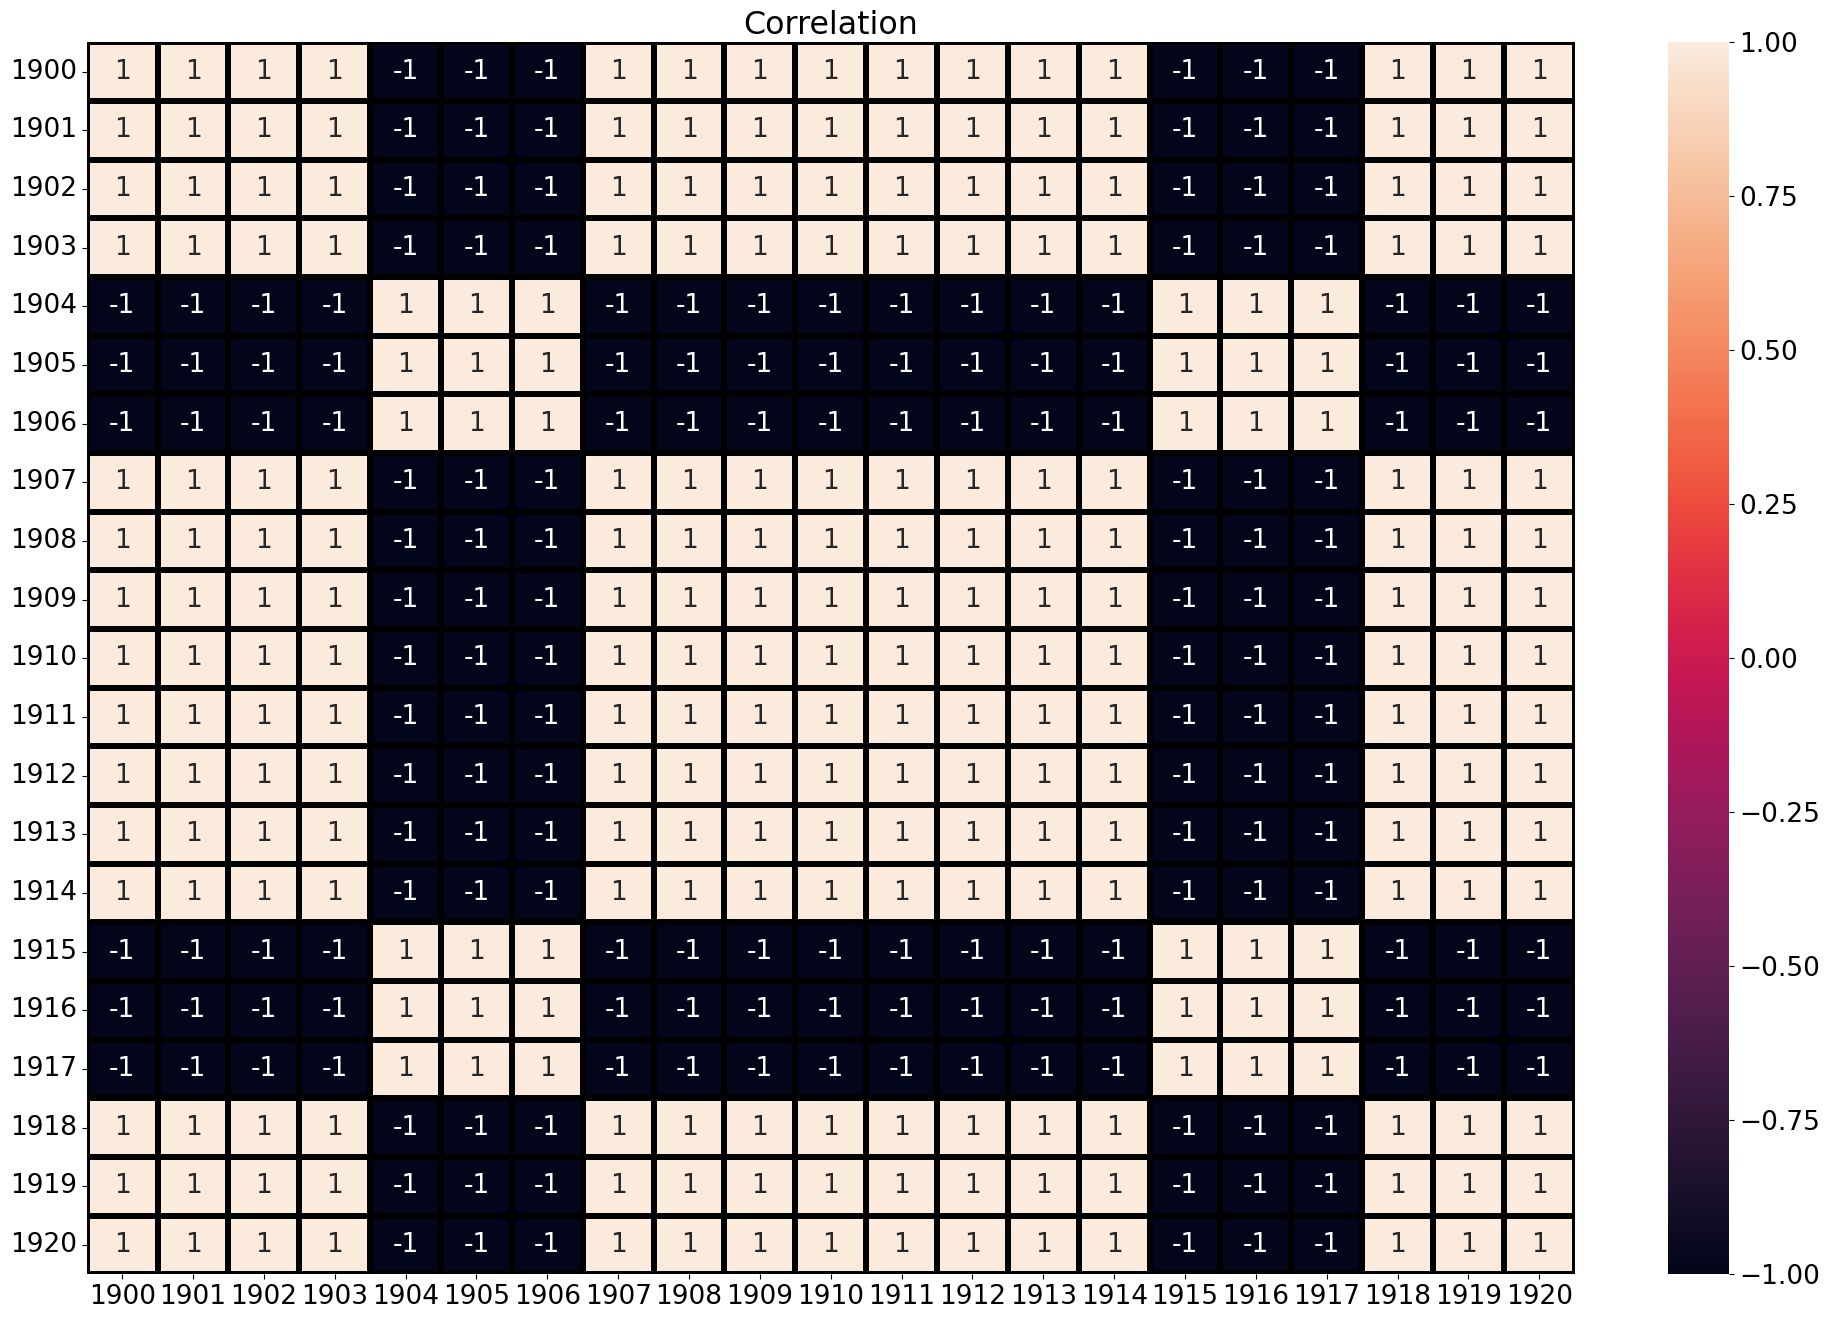

In [128]:
import pandas as pd
xx = pd.DataFrame(x[1:3], columns = list(map(lambda x: int(x), x[0]))) #узнал у других
plt.figure(figsize = (24, 16))
plt.title('Correlation')
ax = sb.heatmap(xx.corr(), annot=True, linewidths=3, linecolor='black')

Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

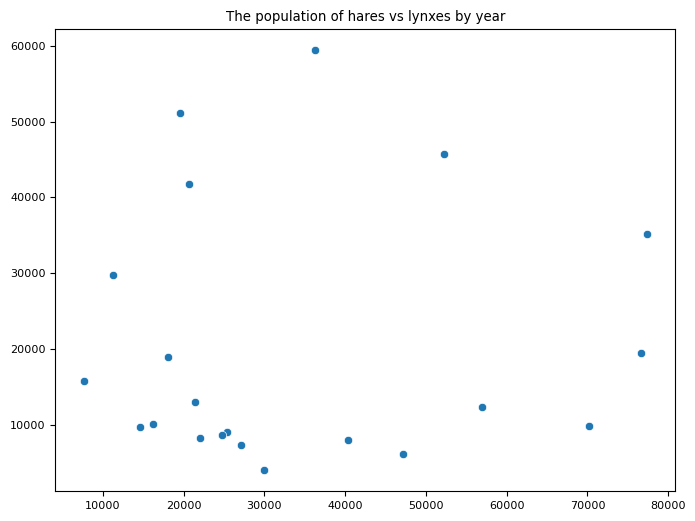

In [143]:
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = '8'
plt.title('The population of hares vs lynxes by year')
correl = sb.scatterplot(x = x[1], y = x[2])

plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

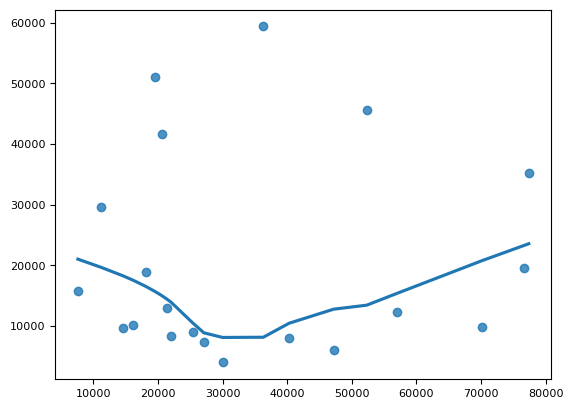

In [171]:
x_new=x[:,:-1]
graph= sb.regplot(x=x_new[1], y=x_new[2], lowess=True)
#не знаю, как вызвать значение кривой, но из графика видно, что при 8.6e3 lynx наблюдается константа почти, судя по наблюдениям близким
#к этому значению, значение будет близко к 27е3 (а точнее в диапазоне от 26е3, 28е3), погрешность будет около 9% (в диап от 5% до 13%)


In [3]:
from sklearn.datasets import fetch_openml

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range (1,30,3):
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(x_train, y_train)
    prediction = k.predict(x_test)

    accuracy = accuracy_score(y_test, prediction)

    print(f'k={i}')
    print(f'accuracy={accuracy}')

k=1
accuracy=0.9735714285714285
k=4
accuracy=0.9704285714285714
k=7
accuracy=0.9697142857142858
k=10
accuracy=0.9658571428571429
k=13
accuracy=0.9665714285714285
k=16
accuracy=0.9647142857142857
k=19
accuracy=0.9624285714285714
k=22
accuracy=0.9608571428571429
k=25
accuracy=0.961
k=28
accuracy=0.9585714285714285


In [11]:
#видно, что точность падает с ростом к. проанализируем ситуацию вблизи 1
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
for i in range (1,5):
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(x_train, y_train)
    prediction = k.predict(x_test)

    accuracy = accuracy_score(y_test, prediction)

    print(f'k={i}')
    print(f'accuracy={accuracy}')

k=1
accuracy=0.9761428571428571
k=2
accuracy=0.9688571428571429
k=3
accuracy=0.9737142857142858
k=4
accuracy=0.9734285714285714


In [12]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)
for i in range (1,5):
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(x_train, y_train)
    prediction = k.predict(x_test)

    accuracy = accuracy_score(y_test, prediction)

    print(f'k={i}')
    print(f'accuracy={accuracy}')

k=1
accuracy=0.9696190476190476
k=2
accuracy=0.9632857142857143
k=3
accuracy=0.9698571428571429
k=4
accuracy=0.9691428571428572
